In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import time
from model.pgm import *

In [2]:
# Real World Data
# 'd' for double, 'l' for uint
datafile = open('./data/iot_unix.uint64','rb')
data = datafile.read(8)
data_len, = struct.unpack('l', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('l',data_bin)
    data.append(data_unix)

100%|██████████| 15190092/15190092 [00:10<00:00, 1445689.51it/s]


In [4]:
epsilon_list = list(range(10,200,15))
Pgm_Index_seg_num = []
Pgm_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    Pgm_Index = Pgm(epsilon)
    Pgm_Index.learn_index(data)
    Pgm_Index_seg_num.append(Pgm_Index.seg_num)
    Pgm_Index_mae.append(Pgm_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

100%|██████████| 15190092/15190092 [02:53<00:00, 87377.82it/s]


10 48211 5.363458430666516


100%|██████████| 15190092/15190092 [02:58<00:00, 85245.17it/s] 


25 16622 13.563251427311961


  0%|          | 9652/15190092 [00:00<02:37, 96512.50it/s]

40 10797 22.212814840094453


  0%|          | 10243/15190092 [00:00<02:28, 102428.14it/s]

55 7863 30.68876929777647


  0%|          | 11009/15190092 [00:00<02:17, 110081.44it/s]

70 6168 39.033268922926865


  0%|          | 10521/15190092 [00:00<02:24, 105206.84it/s]

85 5040 47.56197013158314


100%|██████████| 15190092/15190092 [03:01<00:00, 83541.80it/s] 


100 4212 55.89077103680478


100%|██████████| 15190092/15190092 [03:01<00:00, 83888.18it/s] 


115 3716 64.54296866668089


100%|██████████| 15190092/15190092 [03:00<00:00, 84032.33it/s] 


130 3352 73.4873907281141


  0%|          | 10637/15190092 [00:00<02:22, 106369.09it/s]

145 3015 82.69466840622164


  0%|          | 10386/15190092 [00:00<02:32, 99325.19it/s]

160 2777 91.37548811422603


  0%|          | 10451/15190092 [00:00<02:26, 103412.93it/s]

175 2556 99.87928558958036


100%|██████████| 15190092/15190092 [02:58<00:00, 85003.18it/s] 

190 2398 108.32086751021653


-180.95789642431416

In [3]:
epsilon_list = list(range(10,200,15))
Pgm_Dynamic_Index_seg_num = []
Pgm_Dynamic_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    Pgm_Dynamic_Index = PgmDynamic(epsilon_list[i],init_epsilon=range(10,200,15))
    Pgm_Dynamic_Index.learn_index_lookahead(data)
    Pgm_Dynamic_Index_seg_num.append(Pgm_Dynamic_Index.seg_num)
    Pgm_Dynamic_Index_mae.append(Pgm_Dynamic_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

100%|██████████| 15190092/15190092 [02:51<00:00, 88594.40it/s]


10 29744 5.743864750786236


100%|██████████| 15190092/15190092 [02:53<00:00, 87599.76it/s] 


25 11206 16.91504133088858


100%|██████████| 15190092/15190092 [02:56<00:00, 85923.57it/s] 


40 7134 27.762334619171497


100%|██████████| 15190092/15190092 [02:56<00:00, 86186.22it/s] 


55 5307 38.51997986582307


100%|██████████| 15190092/15190092 [02:57<00:00, 85796.92it/s] 


70 4603 44.584443728188084


100%|██████████| 15190092/15190092 [02:57<00:00, 85656.33it/s] 


85 4049 54.843253418083314


100%|██████████| 15190092/15190092 [02:59<00:00, 84668.52it/s] 


100 3589 63.812660515815175


100%|██████████| 15190092/15190092 [02:59<00:00, 84671.45it/s] 


115 3337 69.44511876557429


100%|██████████| 15190092/15190092 [03:00<00:00, 84321.70it/s] 


130 3066 79.71154947580304


100%|██████████| 15190092/15190092 [02:59<00:00, 84774.72it/s] 


145 2830 88.3937293467347


100%|██████████| 15190092/15190092 [03:01<00:00, 83761.71it/s] 


160 2700 95.02700457640414


100%|██████████| 15190092/15190092 [03:01<00:00, 83831.38it/s] 


175 2482 104.67674316916579


100%|██████████| 15190092/15190092 [03:01<00:00, 83568.80it/s] 

190 2330 114.90006275143034


-179.6710324020913

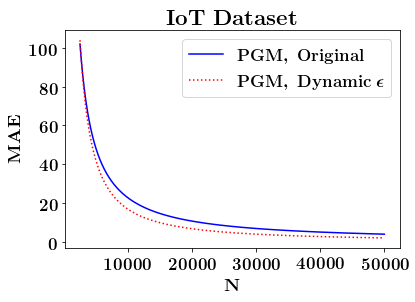

In [8]:
x = np.arange(2500,50000)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('$\mathrm{IoT~Dataset}$')
plt.xlabel('$\mathrm{N}$')
plt.ylabel('$\mathrm{MAE}$')
plt.xticks()
plt.yticks()
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,Pgm_Index_seg_num,Pgm_Index_mae)
p2,_ = curve_fit(func,Pgm_Dynamic_Index_seg_num,Pgm_Dynamic_Index_mae)
#p3,_ = curve_fit(func,Pgm_Index_seg_num,Pgm_Index_mae)
#p4,_ = curve_fit(func,Pgm_Dynamic_Index_seg_num,Pgm_Dynamic_Index_mae)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='$\mathrm{PGM,~Original}$')
#plt.scatter(Pgm_Index_seg_num, Pgm_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='$\mathrm{PGM,~Dynamic~\epsilon}$')
#plt.scatter(Pgm_Dynamic_Index_seg_num, Pgm_Dynamic_Index_mae,c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/PGM/IoT_tradeoff_30"), bbox_inches='tight', pad_inches=0)

In [7]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2,1-AUC2/AUC1

(674131.68559073, 503773.53224168014, 0.2527075302798859)